<a href="https://www.kaggle.com/code/ahmedalyafai/notebook9d51ddfc72?scriptVersionId=253871453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dir=os.path.join(dirname, filename)
        if(filename=="train.csv"):
            train_data=pd.read_csv(dir)
        elif(filename=="test.csv"):
            test_data=pd.read_csv(dir)
        elif(filename=="gender-submission.csv"):
            sample_s_data=pd.read_csv(dir)

### desscription of the numerical variables

In [2]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [4]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data exploration

In [6]:
df=train_data.copy()
Servived_grouped=df.groupby('Survived').agg(
    female_count=('Sex', lambda x: x[df.loc[x.index, 'Sex'] =='female'].count()),
    Male_count=('Sex', lambda x: x[df.loc[x.index, 'Sex']=='male'].count()),
    Fare=('Fare', 'mean')
)

Servived_grouped

,female_count,Male_count,Fare
Survived,,,
0,81,468,22.117887
1,233,109,48.395408


In [7]:
# Calculation the sum of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Survived'].unique()

array([0, 1])

In [9]:
df.groupby(['Survived','Sex'])['Age'].value_counts()

Survived  Sex     Age 
0         female  18.0    5
                  2.0     4
                  9.0     4
                  21.0    3
                  25.0    3
                         ..
1         male    52.0    1
                  56.0    1
                  60.0    1
                  62.0    1
                  80.0    1
Name: count, Length: 216, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize(x,y):
    sns.set_color_codes('pastel')
    sns.barplot(x=x, y=y, hue='Survived', data=df)
    plt.show()

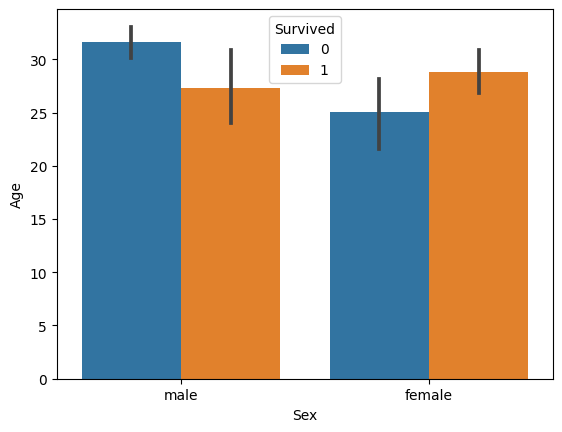

In [11]:
visualize('Sex', 'Age')

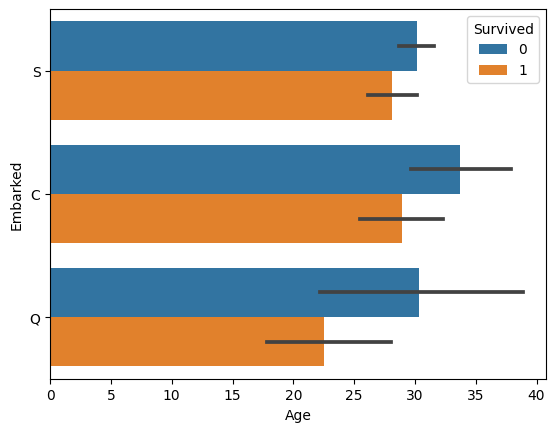

In [12]:
visualize('Age', 'Embarked')

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing values exists!!
<b>in Cabin column where they can singificantly determines model's ability to predict<b>

#### replacing the missing values for the embarked and cabin
#### in this tutorial we will replace the cabin with a specific value as the absence of the values represent a special case

In [22]:
# replacing the missing values for Embarked with the mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isnull().sum()

0

In [27]:
#replacing the missing values for the cabin with a special value
# in this example we will replace with 0
df['Cabin']=df['Cabin'].fillna(0)

In [ ]:
df['Cabin']=df['Cabin'].replace(0, '0')
df['Cabin'].unique()

### Now we will make a chia square to test the independence of the age to base the logic for filling the age missing values

In [63]:
from scipy.stats import contingency
stat_data=df.dropna().copy()
total_stats=pd.DataFrame()
stat_data['Age_groups']=pd.cut(stat_data['Age'],
                       bins=[0,15,30,45,60,75,100],
                       labels=['0-15', '16-30', '31-45', '46-60', '61-75', '75+'])

for i in stat_data.drop(['Age_groups','Age','PassengerId','Name','Survived'], axis=1):
    observation=pd.crosstab(stat_data[i], stat_data['Age_groups'])
    stat=contingency.chi2_contingency(observation)
    table=pd.DataFrame({
        "static":[stat.statistic],
        "p_value":[stat.pvalue],
        "variable":[i]
    })
    total_stats=pd.concat([total_stats, table], ignore_index=True)

# strong relationship
strong_relationship=total_stats[total_stats['p_value']< 0.01]
strong_relationship

,static,p_value,variable
0,109.612981,6.385979e-19,Pclass
2,193.250319,6.065986e-28,SibSp
3,234.370389,1.533288e-33,Parch
4,2956.404980,4.396826e-04,Ticket
5,1378.032207,1.025477e-08,Fare
6,1542.509190,1.202584e-70,Cabin


<b>Therefore, we will do XGboost to predict the missing values for the Cabin then we will use as base along other variables to determines the missing values for the age column <b>

In [15]:
def counts(series):
    return series.value_counts().to_dict()
    
df.loc[~(df['Cabin'].isnull()), ['Pclass', 'Embarked', 'Fare','Cabin']].groupby(df['Embarked']).agg(
    Cabin_count=('Cabin',counts)
)

,Cabin_count
Embarked,
C,"{'B35': 2, 'D36': 2, 'D20': 2, 'C68': 2, 'B18'..."
Q,"{'C78': 2, 'E101': 1, 'F38': 1}"
S,"{'B96 B98': 4, 'G6': 4, 'C23 C25 C27': 4, 'F2'..."


In [16]:
# encode all categoircal columns at the same time
from sklearn.preprocessing import LabelEncoder
def label_encode(t):
    le=LabelEncoder()
    for i in t.columns:
        if i in t.select_dtypes(include='object'):
            t[i]=le.fit_transform(t[i])
    return t

In [17]:
# Prepare the data for modelling
df2=df[~(df.isnull()).any(axis=1)].reset_index()
df2=label_encode(df2)
X=df2.drop(['Cabin', 'index', 'PassengerId', 'Name'], axis=1).copy()
Y=df2['Cabin'].copy()

# df3=df[df.isnull().any(axis=1)].reset_index()

In [18]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_metrix
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(X,Y, test_size=.3, random_state=42)

decision_tree=DecisionTreeClassifier(criterion='log_loss', splitter='best', 
                                           max_depth=None, min_samples_split=2)

decision_tree.fit(x_train, y_train)
# xgboost=XGBClassifier(objective='multi:softmax',n_estimators=1000, learning_rate=0.5, early_stopping_rounds=10)
# xgboost.fit(x_train, y_train,
#             verbose=True,
#             eval_set=[(x_test, y_test))
# y_predicted=xgboost.predict(x_test)
y_predicted=decision_tree.predict(x_test)
accuracy_score(y_test, y_predicted)


ImportError: cannot import name 'confusion_metrix' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

* Now we have to compute the missing values for the age column based on specific relationships

In [ ]:
#convert age field to numerical field
df['Age']=df['Age'].astype(int)

### The next Process involve:
making a correlation matrix to test the importance and the correlation between the variables


## prerocessing the data for correlation matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if i in df.select_dtypes(include='object'):
        df[i]=le.fit_transform(df[i])

In [ ]:
train_data.isnull().sum()

In [ ]:
import seaborn as sns

correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', linewidth=2)
plt.show()